In [1]:
# notebook dependencies 
import os # used in caching
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# regular expression import
import re

# JSON import
import json

# importing BeautifulSoup for parsing HTML/XTML
from bs4 import BeautifulSoup as BSoup

# request module for connecting to APIs
from requests import get

# text prepare modules
import acquire
import prepare

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

#sklearn
from sklearn.model_selection import train_test_split

In [2]:
# list of english stop words

print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
# pulling in the acquire df

df = pd.read_csv("metaverse.csv")

In [4]:
# df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             998 non-null    object
 1   language         682 non-null    object
 2   readme_contents  741 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


In [5]:
# specifying the column dtypes

df = df[["repo", "language", "readme_contents"]].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             998 non-null    object
 1   language         998 non-null    object
 2   readme_contents  998 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


In [6]:
# creating a function titled, 'basic_clean'
# lowercase everything
# normalize unicode characters
# replace non-alphanumeric characters with whitespace

def basic_clean(string):

    # lowercase the text
    string = string.lower()

    # normalizing the text
    string = unicodedata.normalize('NFKD', string).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # return only alphanumeric values in text: everything else, convert to whitespace
    string = re.sub("[^a-z0-9\s']", '', string)
    
    # return the string text
    return string

In [7]:
# viewing the clean/tokenize/stem/lemmatization process

df["clean"] = df["readme_contents"].apply(prepare.basic_clean).apply(prepare.tokenize).apply(prepare.remove_stopwords, include_words = ["metaverse", "Metaverse", "meta-verse", "Meta-verse", "meta verse", "Meta Verse", "Meta verse"])
df["stemmed"] = df["clean"].apply(prepare.porter_stem)
df["lemmatized"] = df["clean"].apply(prepare.lemmatize)

df.head(20)

,repo,language,readme_contents,clean,stemmed,lemmatized
0,M3-org/awesome-metaverse,nan,# Awesome Metaverse [![Awesome](https://awesom...,awesome awesome https awesome badge svg https ...,awesom awesom http awesom badg svg http awesom...,awesome awesome http awesome badge svg http aw...
1,mvs-org/metaverse,C++,Metaverse Core Integration/staging Tree\n=====...,core integration staging tree build status htt...,core integr stage tree build statu http travi ...,core integration staging tree build status htt...
2,webaverse/app,JavaScript,"<img src=""docs/banner.jpeg"" width=100% />\n\n<...",img src docs banner jpeg width 100 align cente...,img src doc banner jpeg width 100 align center...,img src doc banner jpeg width 100 align center...
3,shadowcz007/awesome-metaverse,nan,"# awesome-metaverse\n<a href=""https://awesome....",awesome href https awesome target blank img al...,awesom href http awesom target blank img alt a...,awesome href http awesome target blank img alt...
4,vircadia/vircadia,C++,"<p align=""center""><a href=""https://vircadia.co...",align center href https vircadia img src inter...,align center href http vircadia img src interf...,align center href http vircadia img src interf...
5,AI4Finance-Foundation/FinRL-Meta,Jupyter Notebook,# FinRL-Meta: A Universe of Market Environment...,finrl meta universe market environments benchm...,finrl meta univers market environ benchmark da...,finrl meta universe market environment benchma...
6,bit-country/Metaverse-Network,Rust,"<p align=""center"">\n <img src=""https://github...",align center img src https bit country network...,align center img src http bit countri network ...,align center img src http bit country network ...
7,omigroup/omigroup,nan,# Open Metaverse Interoperability Group (OMI)\...,open interoperability group omi club https img...,open interoper group omi club http img shield ...,open interoperability group omi club http img ...
8,joaneeet7/Metaverse,JavaScript,nan,nan,nan,nan
9,houbb/awesome-metaverse-zh,Batchfile,# Awesome Metaverse [![Awesome](https://awesom...,awesome awesome https awesome badge svg https ...,awesom awesom http awesom badg svg http awesom...,awesome awesome http awesome badge svg http aw...


In [8]:
# creating a df that shows the clean/tokenize/stem/and lemmatization process

df.to_csv("cleaned_comparison_file.csv", index = False)

In [9]:
# def mass_text_clean(text, include_words=None, exclude_words=None):

#     text = basic_clean(text)

#     text = lemmatize(text)

#     text = remove_stopwords(text, include_words = include_words, exclude_words = exclude_words)

#     return list(text.split(' '))

In [10]:
'''Function to clean the original data objects/df'''
def clean_data_objects(df):
    df = df[[
        "repo", \
        "language", \
        "readme_contents"]].astype(str)

    print(f'df shape: {df.shape}')

    return df

In [11]:
# testing function
df = pd.read_csv("metaverse.csv")

df = prepare.clean_data_objects(df)
df.head() # checks out!

df shape: (998, 3)


,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,# Awesome Metaverse [![Awesome](https://awesom...
1,mvs-org/metaverse,C++,Metaverse Core Integration/staging Tree\n=====...
2,webaverse/app,JavaScript,"<img src=""docs/banner.jpeg"" width=100% />\n\n<..."
3,shadowcz007/awesome-metaverse,nan,"# awesome-metaverse\n<a href=""https://awesome...."
4,vircadia/vircadia,C++,"<p align=""center""><a href=""https://vircadia.co..."


In [12]:
# using the mass_text_clean function

df["readme_contents"] = df["readme_contents"].apply(prepare.mass_text_clean)
df.head() # check outs

,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,awesome awesome awesome badge svg awesome list...
1,mvs-org/metaverse,C++,core integration staging tree build status tra...
2,webaverse/app,JavaScript,img src doc banner jpeg width 100 align center...
3,shadowcz007/awesome-metaverse,nan,awesome href awesome target blank img alt awes...
4,vircadia/vircadia,C++,align center href vircadia img src interface r...


In [13]:
df.language.value_counts()

nan                 316
JavaScript          266
C#                   78
HTML                 72
TypeScript           70
Solidity             27
CSS                  23
Python               22
Rust                 16
Go                   15
C++                  14
Jupyter Notebook     11
Java                  7
ShaderLab             7
SCSS                  6
Vue                   5
Shell                 5
PHP                   5
SuperCollider         3
Clojure               3
Batchfile             2
Roff                  2
Swift                 2
C                     2
GLSL                  2
GDScript              2
Objective-C           2
Kotlin                2
HCL                   1
EJS                   1
PowerShell            1
Svelte                1
TeX                   1
Objective-C++         1
Cadence               1
Metal                 1
R                     1
LSL                   1
ASP.NET               1
Name: language, dtype: int64

In [14]:
# Limit to repos with a language
df=df.loc[df['language'] != 'nan']

In [15]:
df['word_count']=df.readme_contents.str.split().str.len()
df

,repo,language,readme_contents,word_count
1,mvs-org/metaverse,C++,core integration staging tree build status tra...,555
2,webaverse/app,JavaScript,img src doc banner jpeg width 100 align center...,420
4,vircadia/vircadia,C++,align center href vircadia img src interface r...,432
5,AI4Finance-Foundation/FinRL-Meta,Jupyter Notebook,finrl meta universe market environment benchma...,1136
6,bit-country/Metaverse-Network,Rust,align center img src bit country network blob ...,345
...,...,...,...,...
990,JRagone/metaverse,JavaScript,nan,1
991,sangyoon-kim1804/metaverse,HTML,nan,1
992,Pariskimhj/Metaverse,JavaScript,nan,1
993,LinasKo/MetaVerse,C#,virtual conference project meataswitch vacatho...,17


In [16]:
# 130 repos without a readme.  I'll leave the language counts in, but make sure 'nan' is not included in word study.
df.loc[df['readme_contents']== 'nan']

,repo,language,readme_contents,word_count
8,joaneeet7/Metaverse,JavaScript,nan,1
61,banyapon/metaverse_cms,HTML,nan,1
62,smsithlord/aarcade-source-legacy,C++,nan,1
71,WhiteMatrixTech/Metaverse-Web3-projects-solici...,JavaScript,nan,1
106,DanielMoralisSamples/31_Gasless_Metaverse,HTML,nan,1
...,...,...,...,...
989,kalaivani1312/metaverse,Python,nan,1
990,JRagone/metaverse,JavaScript,nan,1
991,sangyoon-kim1804/metaverse,HTML,nan,1
992,Pariskimhj/Metaverse,JavaScript,nan,1


In [17]:
df.language.value_counts()

JavaScript          266
C#                   78
HTML                 72
TypeScript           70
Solidity             27
CSS                  23
Python               22
Rust                 16
Go                   15
C++                  14
Jupyter Notebook     11
Java                  7
ShaderLab             7
SCSS                  6
PHP                   5
Vue                   5
Shell                 5
Clojure               3
SuperCollider         3
C                     2
Objective-C           2
GDScript              2
GLSL                  2
Roff                  2
Swift                 2
Batchfile             2
Kotlin                2
EJS                   1
PowerShell            1
Svelte                1
HCL                   1
R                     1
Objective-C++         1
Cadence               1
LSL                   1
TeX                   1
Metal                 1
ASP.NET               1
Name: language, dtype: int64

### Looking to categorize some of the categories.
- Multiple "C" languages
- Multiple names for similar languages (Jupyternotebook/python, Powershell/Shell)

In [18]:
df=df.replace('Jupyter Notebook', 'Python')

In [19]:
df.language.value_counts()

JavaScript       266
C#                78
HTML              72
TypeScript        70
Python            33
Solidity          27
CSS               23
Rust              16
Go                15
C++               14
Java               7
ShaderLab          7
SCSS               6
PHP                5
Vue                5
Shell              5
SuperCollider      3
Clojure            3
Batchfile          2
Roff               2
Swift              2
C                  2
GLSL               2
GDScript           2
Objective-C        2
Kotlin             2
HCL                1
EJS                1
PowerShell         1
Svelte             1
R                  1
Objective-C++      1
Cadence            1
Metal              1
TeX                1
LSL                1
ASP.NET            1
Name: language, dtype: int64

In [20]:
df=df.replace(('Objective-C++','Objective-C','C','C++','C#','SuperCollider','GLSL'),'C')
df=df.replace(('JavaScript', 'Vue','Clojure','Kotlin','EJS'), 'Java')
df=df.replace('Svelte','TypeScript')
df=df.replace(('PowerShell','Batchfile','Shell'),'Microsoft')
df=df.replace(('Metal','Swift'),'iOS')
df=df.replace(('Microsoft','ShaderLab','SCSS','PHP','iOS','GDScript','Roff','HCL','TeX', 'Cadence','R','LSL','ASP.NET'),'other')

In [21]:
df.language.value_counts()

Java          284
C             102
HTML           72
TypeScript     71
other          39
Python         33
Solidity       27
CSS            23
Rust           16
Go             15
Name: language, dtype: int64

In [22]:
def update_languages(df):
    ''' Dataset has multiple languages.  SOme languages are itterations of other languages.
    This function is to replace some of the languages names so the are in the same category'''
    # Jupyter notebook as Python
    df=df.replace('Jupyter Notebook', 'Python')
    # C Related Languages
    df=df.replace(('Objective-C++','Objective-C','C','C++','C#','SuperCollider','GLSL'),'C')
    # Java Related Languages ans sublanguages
    df=df.replace(('JavaScript', 'Vue','Clojure','Kotlin','EJS'), 'Java')
    # TypeScript Languages
    df=df.replace('Svelte','TypeScript')
    # Microsoft languages for windows applications
    df=df.replace(('PowerShell','Batchfile','Shell'),'Microsoft')
    # iOS related languages
    df=df.replace(('Metal','Swift'),'iOS')
    # languages with < 10 usage
    df=df.replace(('Microsoft','ShaderLab','SCSS','PHP','iOS','GDScript','Roff','HCL','TeX', 'Cadence','R','LSL','ASP.NET'),'other')
    
    return df

In [23]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [24]:
train, validate, test = train_validate_test_split(df, 'language')

In [25]:
train.head()

,repo,language,readme_contents,word_count
856,devesh-gith/Metaverse,Java,next nextjs project bootstrapped create next a...,151
861,dezhizhang/metaverse,Java,,0
666,kaoskorobase/metaverse1-soundscape-rendering,C,metaverse1 soundscape rendering system metaver...,158
150,lulurun/fanni,C,nan,1
560,flookkyz/Website-Company-MetaverseXr,Java,next nextjs project bootstrapped create next a...,151


In [26]:
java_words = (' '.join(train.readme_contents[train.language == 'Java'])).split()
python_words = (' '.join(train.readme_contents[train.language == 'Python'])).split()
c_words = (' '.join(train.readme_contents[train.language == 'C'])).split()
html_words = (' '.join(train.readme_contents[train.language == 'HTML'])).split()
type_words = (' '.join(train.readme_contents[train.language == 'TypeScript'])).split()
other_words = (' '.join(train.readme_contents[train.language == 'other'])).split()
solidity_words = (' '.join(train.readme_contents[train.language == 'Solidity'])).split()
css_words = (' '.join(train.readme_contents[train.language == 'CSS'])).split()
rust_words = (' '.join(train.readme_contents[train.language == 'Rust'])).split()
go_words = (' '.join(train.readme_contents[train.language == 'Go'])).split()
all_words = (' '.join(train.readme_contents)).split()

java_freq = pd.Series(java_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
type_freq = pd.Series(type_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
solidity_freq = pd.Series(solidity_words).value_counts()
css_freq = pd.Series(css_words).value_counts()
rust_freq = pd.Series(rust_words).value_counts()
go_freq = pd.Series(go_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [27]:
word_counts = (pd.concat([all_freq, java_freq, python_freq, c_freq, html_freq, type_freq, other_freq, solidity_freq, css_freq, rust_freq, go_freq], axis=1, sort=True)
              .set_axis(['all','Java', 'Python', 'C', 'HTML','TypeScript','other','Solidity','CSS','Rust', 'Go'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

In [28]:
print('java words: ' + str(len(java_words)))
print('python words: ' + str(len(python_words)))
print('c words: ' + str(len(c_words)))
print('html words: ' + str(len(html_words)))
print('type words: ' + str(len(type_words)))
print('other words: ' + str(len(other_words)))
print('solidity words: ' + str(len(solidity_words)))
print('css words: ' + str(len(css_words)))
print('rust words: ' + str(len(rust_words)))
print('go words: ' + str(len(go_words)))
print('all words: ' + str(len(all_words)))

java words: 28719
python words: 7952
c words: 9468
html words: 2421
type words: 8661
other words: 4063
solidity words: 3442
css words: 886
rust words: 3491
go words: 1406
all words: 70509


In [29]:
word_counts.sort_values(by='all', ascending=False).head(20)

,all,Java,Python,C,HTML,TypeScript,other,Solidity,CSS,Rust,Go
0,869,682,23,67,8,18,16,31,0,19,5
app,621,526,0,22,0,42,15,3,12,1,0
doc,569,437,22,43,2,35,9,0,8,7,6
create,538,412,9,25,11,37,14,8,8,9,5
img,470,169,56,57,12,109,6,0,22,34,5
next,464,370,0,1,0,53,2,3,34,1,0
run,452,233,15,12,19,96,28,6,6,23,14
npm,396,251,0,3,17,120,0,1,4,0,0
project,384,152,22,84,27,62,4,16,9,7,1
build,374,206,5,44,11,49,23,3,1,28,4


In [30]:
# extra_words = ['see', 'http', 'com','github','org', 'source', 'example', 'code', 'use', '1', "'", ';', '&#9']

## Bigrams!

Text(0.5, 0, 'Frequency')

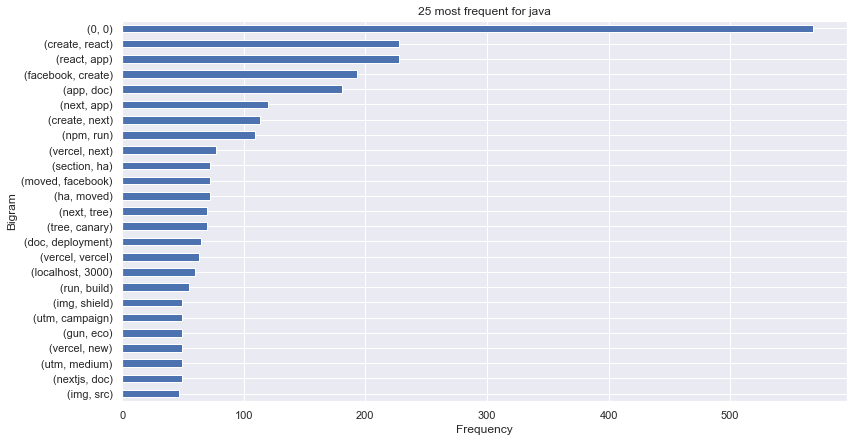

In [31]:
java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
               .value_counts()
               .head(25))
java_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for java')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

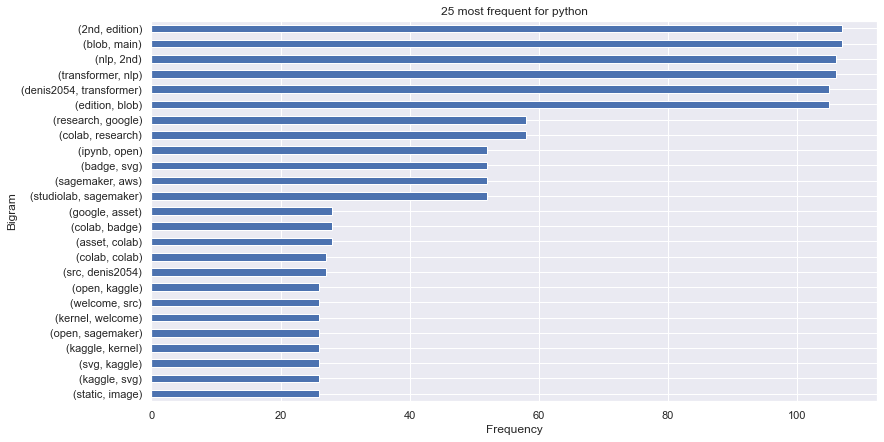

In [32]:
python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
               .value_counts()
               .head(25))
python_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for python')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

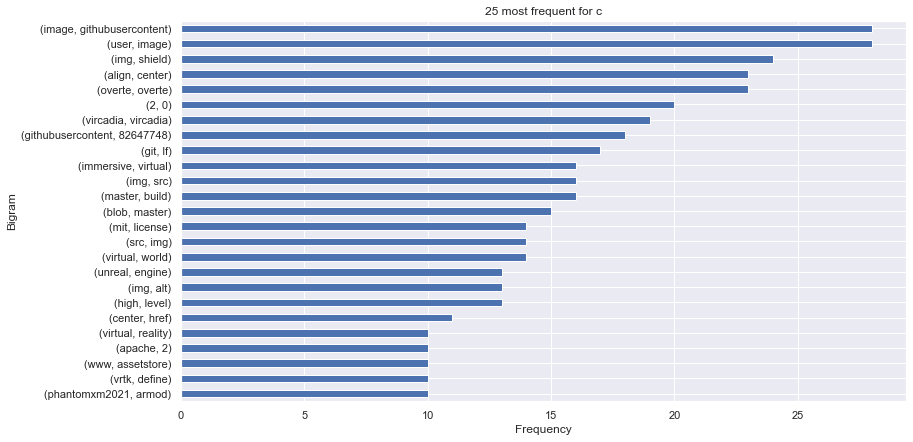

In [33]:
c_bigrams = (pd.Series(nltk.ngrams(c_words, 2))
               .value_counts()
               .head(25))
c_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for c')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

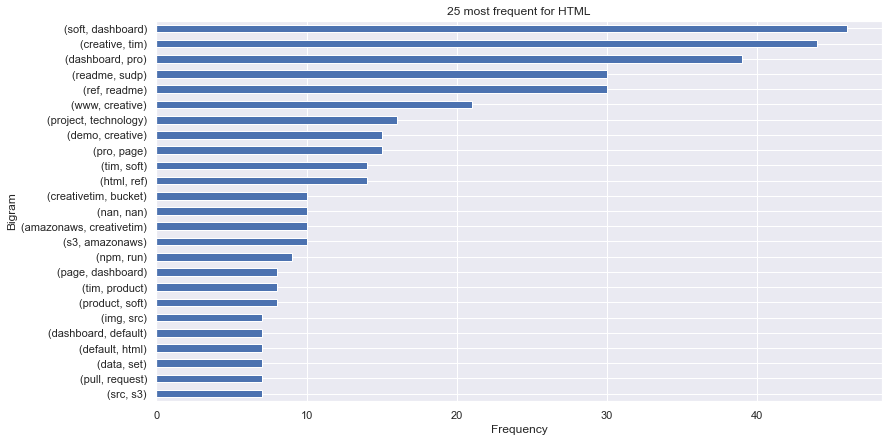

In [34]:
html_bigrams = (pd.Series(nltk.ngrams(html_words, 2))
               .value_counts()
               .head(25))
html_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for HTML')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

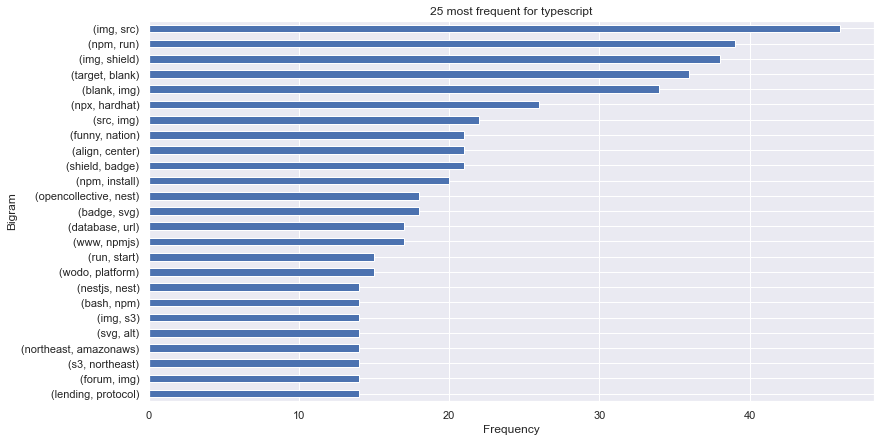

In [35]:
type_bigrams = (pd.Series(nltk.ngrams(type_words, 2))
               .value_counts()
               .head(25))
type_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for typescript')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

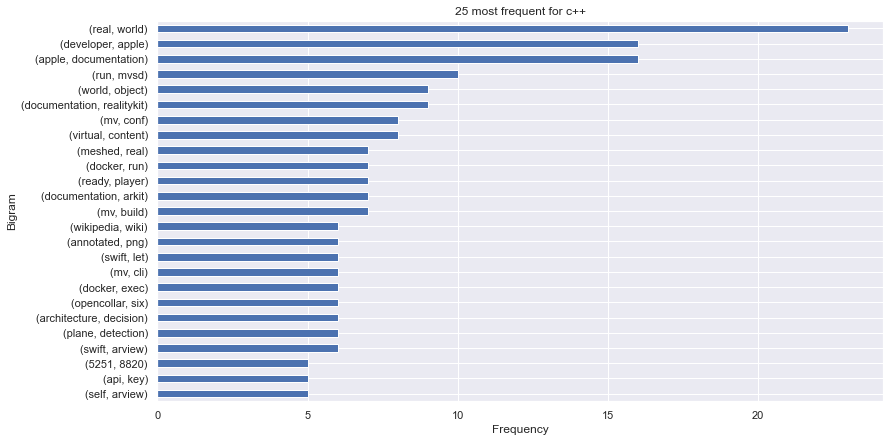

In [36]:
other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
               .value_counts()
               .head(25))
other_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for c++')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

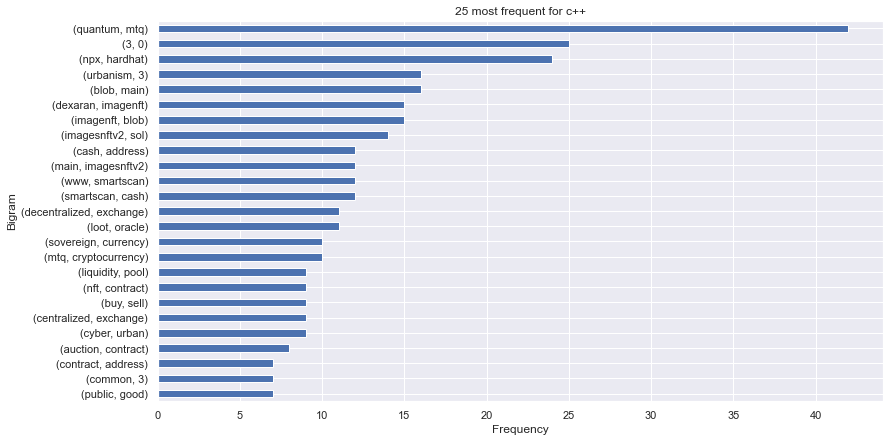

In [37]:
solidity_bigrams = (pd.Series(nltk.ngrams(solidity_words, 2))
               .value_counts()
               .head(25))
solidity_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for c++')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

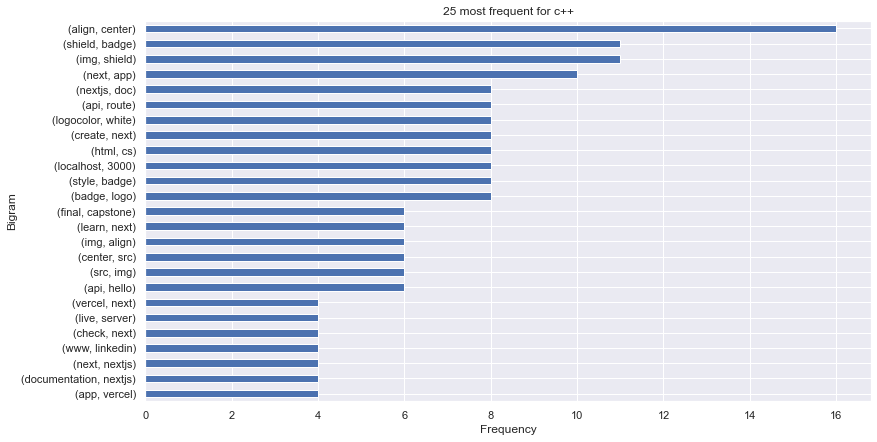

In [38]:
css_bigrams = (pd.Series(nltk.ngrams(css_words, 2))
               .value_counts()
               .head(25))
css_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for c++')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

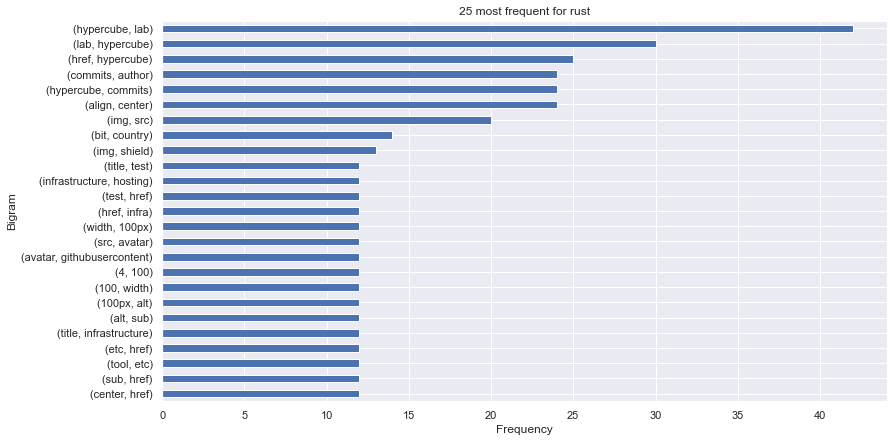

In [39]:
rust_bigrams = (pd.Series(nltk.ngrams(rust_words, 2))
               .value_counts()
               .head(25))
rust_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for rust')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

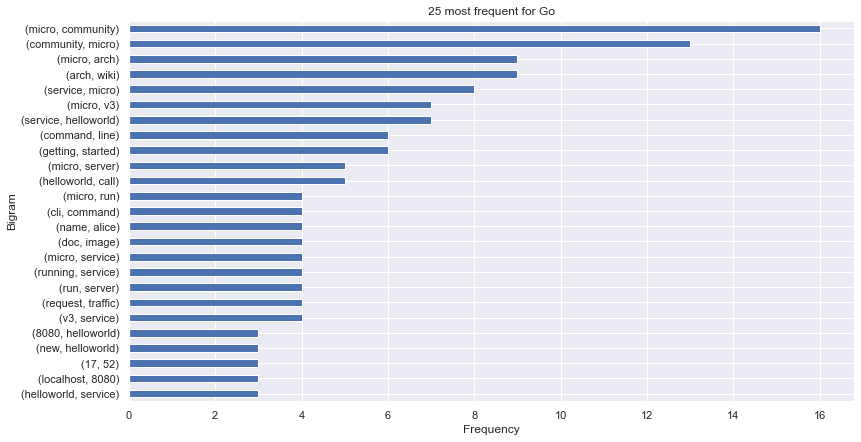

In [40]:
go_bigrams = (pd.Series(nltk.ngrams(go_words, 2))
               .value_counts()
               .head(25))
go_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for Go')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

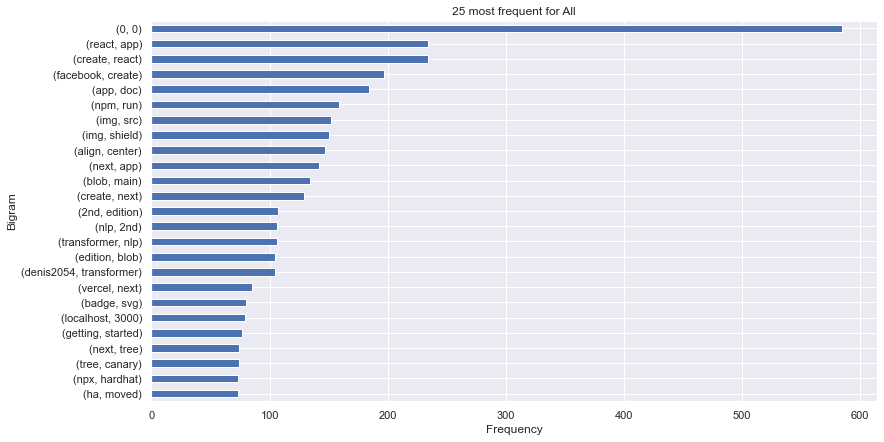

In [41]:
all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
               .value_counts()
               .head(25))
all_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for All')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

## Trigrams

Text(0.5, 0, 'Frequency')

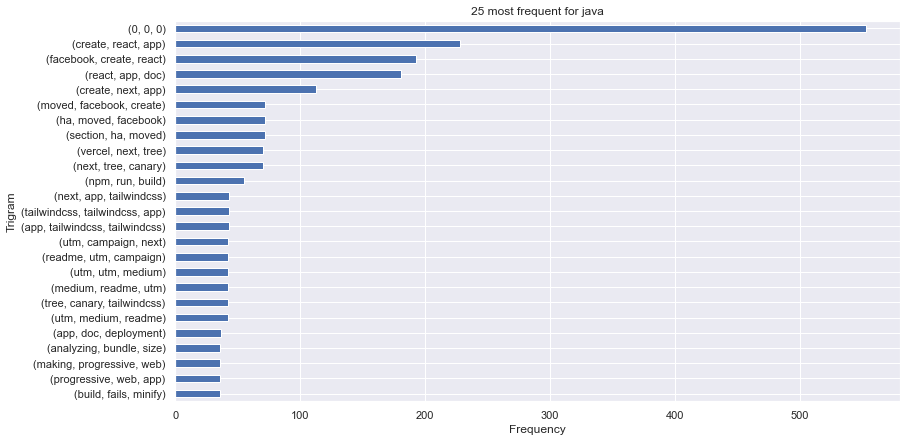

In [42]:
java_trigrams = (pd.Series(nltk.ngrams(java_words, 3))
               .value_counts()
               .head(25))
java_trigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for java')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

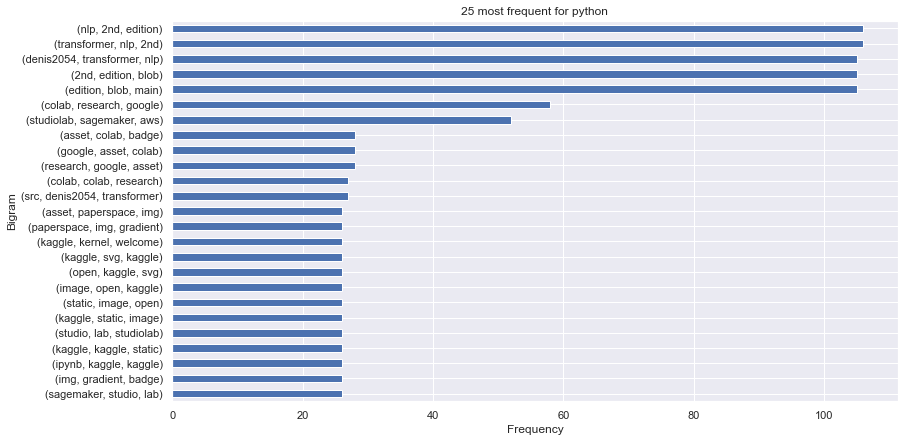

In [43]:
python_trigrams = (pd.Series(nltk.ngrams(python_words, 3))
               .value_counts()
               .head(25))
python_trigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for python')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

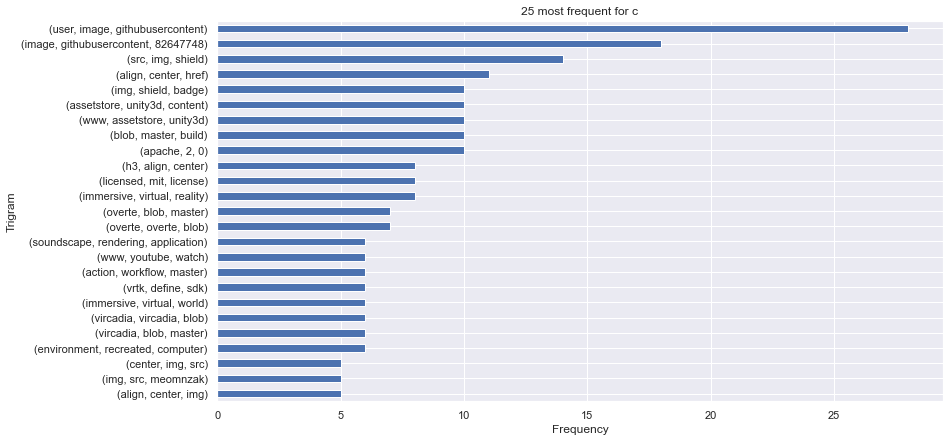

In [44]:
c_trigrams = (pd.Series(nltk.ngrams(c_words, 3))
               .value_counts()
               .head(25))
c_trigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for c')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

tfidf = TfidfVectorizer()

In [46]:
train.head()

,repo,language,readme_contents,word_count
856,devesh-gith/Metaverse,Java,next nextjs project bootstrapped create next a...,151
861,dezhizhang/metaverse,Java,,0
666,kaoskorobase/metaverse1-soundscape-rendering,C,metaverse1 soundscape rendering system metaver...,158
150,lulurun/fanni,C,nan,1
560,flookkyz/Website-Company-MetaverseXr,Java,next nextjs project bootstrapped create next a...,151


In [47]:
java_words = (' '.join(train.readme_contents[train.language == 'Java']))
python_words = (' '.join(train.readme_contents[train.language == 'Python']))
c_words = (' '.join(train.readme_contents[train.language == 'C']))
html_words = (' '.join(train.readme_contents[train.language == 'HTML']))
type_words = (' '.join(train.readme_contents[train.language == 'TypeScript']))
other_words = (' '.join(train.readme_contents[train.language == 'other']))
solidity_words = (' '.join(train.readme_contents[train.language == 'Solidity']))
css_words = (' '.join(train.readme_contents[train.language == 'CSS']))
rust_words = (' '.join(train.readme_contents[train.language == 'Rust']))
go_words = (' '.join(train.readme_contents[train.language == 'Go']))
all_words = (' '.join(train.readme_contents))

In [48]:
j_img = WordCloud(background_color='white').generate(java_words)
p_img = WordCloud(background_color='white').generate(python_words)
c_img = WordCloud(background_color='white').generate(c_words)
h_img = WordCloud(background_color='white').generate(html_words)
t_img = WordCloud(background_color='white').generate(type_words)
o_img = WordCloud(background_color='white').generate(other_words)
s_img = WordCloud(background_color='white').generate(solidity_words)
css_img = WordCloud(background_color='white').generate(css_words)
r_img = WordCloud(background_color='white').generate(rust_words)
g_img = WordCloud(background_color='white').generate(go_words)
a_img = WordCloud(background_color='white').generate(all_words)
imgs = [j_img, p_img, c_img, h_img, t_img, o_img,s_img, css_img, r_img, g_img, a_img]

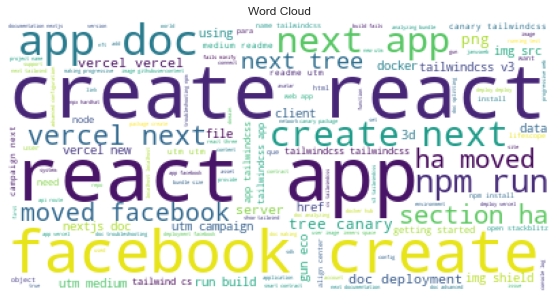

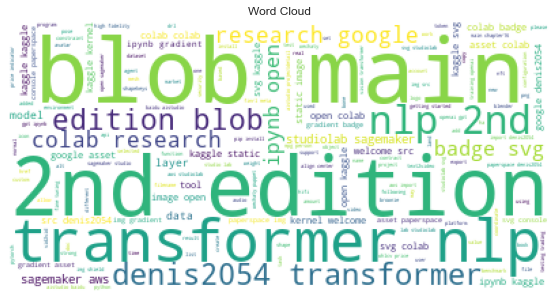

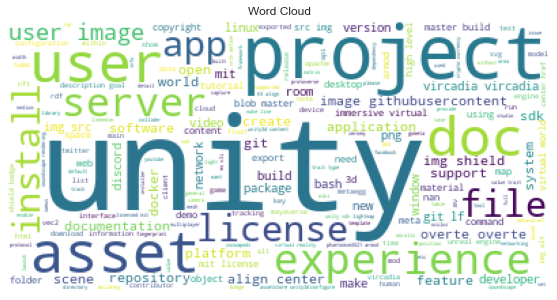

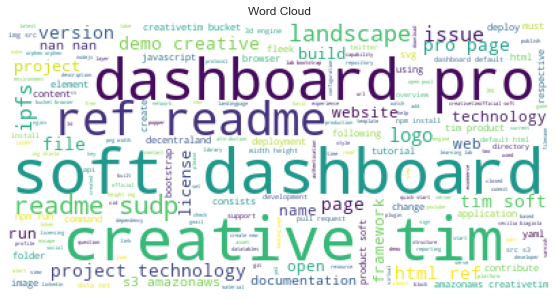

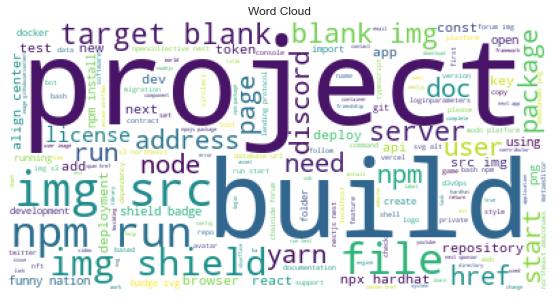

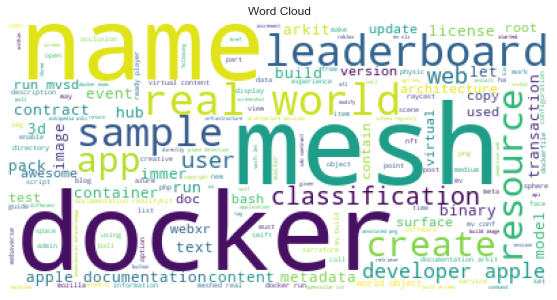

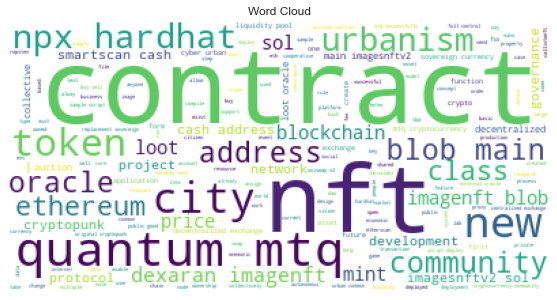

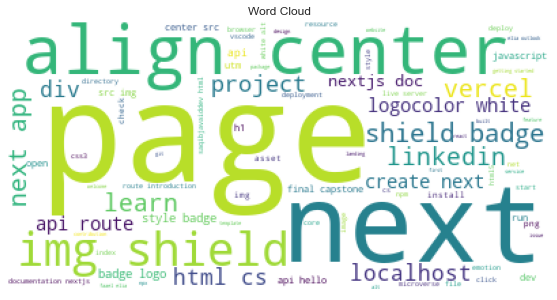

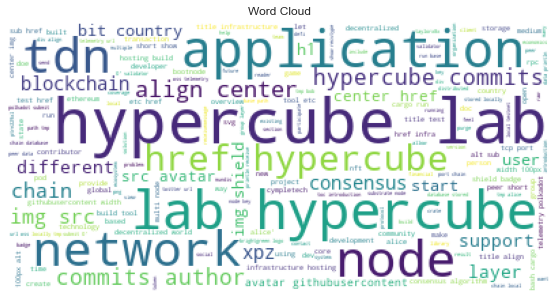

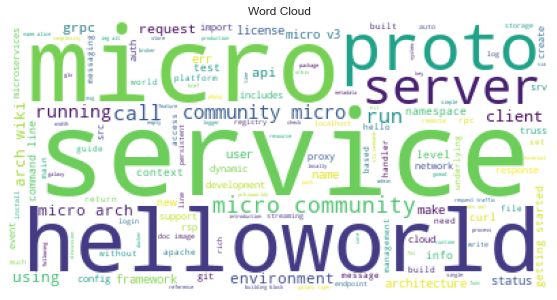

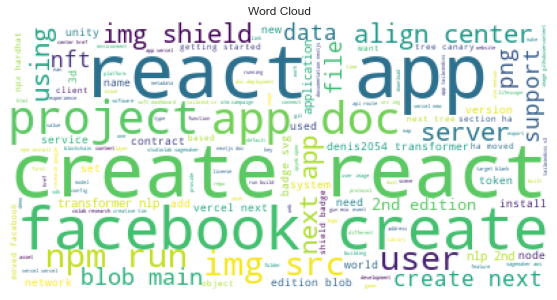

In [49]:
for i in imgs:
    plt.figure(figsize=(10,5))
    plt.title('Word Cloud')
    plt.imshow(i)
    plt.axis('off')

In [50]:
def word_cloud(train, language):
    '''
    
    '''
    # Getting our specified language words
    words = (' '.join(train.readme_contents[train.language == language]))
    # Making our WordCloud image object
    img = WordCloud(background_color='white').generate(words)
    # Displaying the WordCloud image
    plt.figure(figsize=(10,5))
    plt.title(f'Word Cloud for {language}')
    plt.imshow(img)
    plt.axis('off')

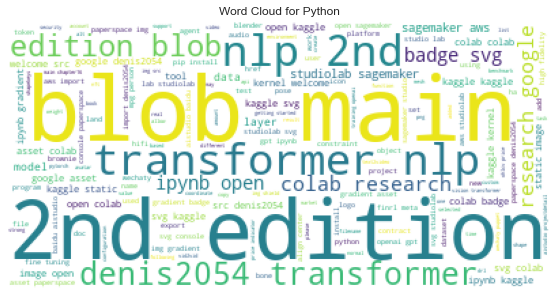

In [51]:
word_cloud(train, 'Python')

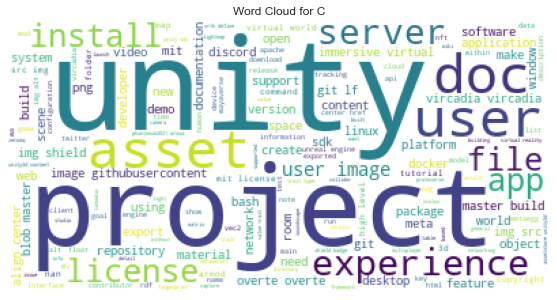

In [52]:
word_cloud(train, 'C')

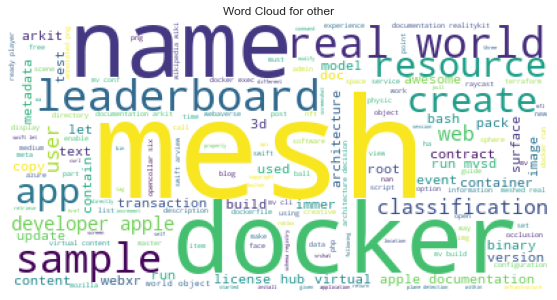

In [53]:
word_cloud(train, 'other')